# A Simple Portfolio
- 50% SPY and 50% TLT

In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
tickers = ['SPY', 'TLT']

start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 12, 31)

data = pdr.get_data_yahoo(tickers, start, end)

In [3]:
data = data['Adj Close']

In [4]:
portfolio = [.5, .5]

<IPython.core.display.Javascript object>


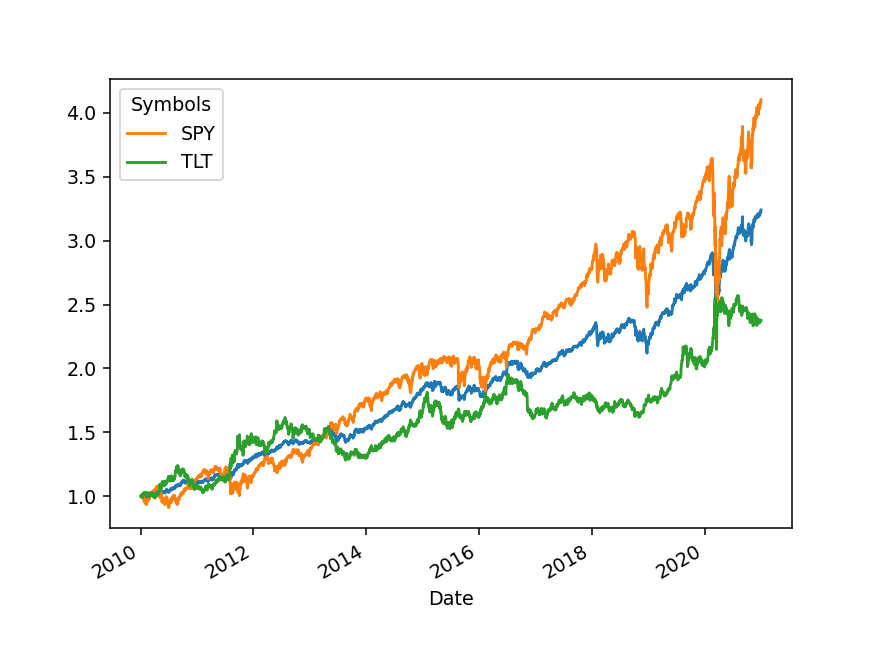

<AxesSubplot:xlabel='Date'>

In [5]:
fig, ax = plt.subplots()

((data/data.iloc[0])*portfolio).sum(axis=1).plot(ax=ax)
(data/data.iloc[0]).plot(ax=ax)

In [6]:
strategy = ((data/data.iloc[0])*portfolio).sum(axis=1)

In [7]:
log_returns = np.log(strategy/strategy.shift())

### GAGR

In [8]:
(strategy.iloc[-1]/strategy.iloc[0])**(1/10) - 1

0.12475912241919063

### Drawdown

In [9]:
rolling_max = strategy.cummax()
daily_drawdown = strategy/rolling_max - 1
max_drawdown = daily_drawdown.cummin().iloc[-1]
max_drawdown

-0.18515900462134338

### Volatility

In [10]:
log_returns.std()*(252**0.5)

0.08679496463492434

### Project
- Annual rebalance

#### Step 1
- Annual rebalance step

In [12]:
concat = []
for year in range(2010, 2020):
    rebalance = (data.loc[str(year)]/data.loc[str(year)].iloc[0]*portfolio).sum(axis=1)
    if year > 2010:
        rebalance = rebalance*concat[-1].iloc[-1]
    concat.append(rebalance)

    
strategy = pd.concat(concat)

#### Step 2
- CAGR

In [13]:
(strategy.iloc[-1]/strategy.iloc[0])**(1/10) - 1

0.10470670252150338

#### Step 3
- Maximum drawdown

In [14]:
rolling_max = strategy.cummax()
daily_drawdown = strategy/rolling_max - 1
max_drawdown = daily_drawdown.cummin().iloc[-1]
max_drawdown

-0.09233279494725888

#### Step 4
- Volatility

In [15]:
(np.log(strategy/strategy.shift())).std()*(252**0.5)

0.07171855082737738

#### Step 5
- Visualization

<IPython.core.display.Javascript object>


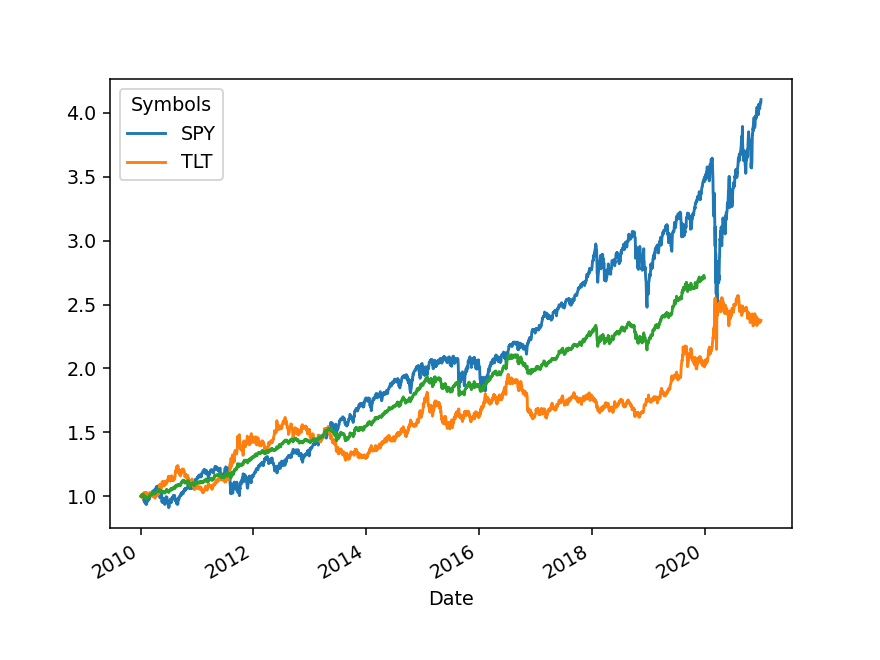

<AxesSubplot:xlabel='Date'>

In [16]:
fig, ax = plt.subplots()

(data/data.iloc[0]).plot(ax=ax)
strategy.plot(ax=ax)